<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/lindevanbeers/Lab-6/linde-report-lab-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential Equations**
**Linde van Beers**

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [128]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Linde van Beers, 2020

# Template: Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In this lab I used my previously implemented functions for Newton's method for scalar functions and systems of functions

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# Newton's method for scalar functions
def newton(f, x, tol = 0.00001):
  
  def g(xk):
    eps = 1e-10
    df = (f(x+eps)-f(x-eps))/(2*eps)  
    if df == 0: # to prevent dividing by 0 we take default value -1 if df = 0 (corresponds to alpha = 1)
      df = -1
    return xk-f(xk)/df
  
  while abs(f(x)) > tol:
    x = g(x)

  return x

# Newton's method for systems
def newton_sys(f, x0, input_shape, output_shape, tol=0.00000001):
  x = x0

  def jacobian(fun, xk):
    eps = 1e-10
    jac = np.zeros([output_shape, input_shape])
    for i in range(input_shape):
      x1 = xk.copy()
      x2 = xk.copy()
      x1[i] += eps
      x2[i] -= eps
      f1 = fun(x1)
      f2 = fun(x2)
      jac[:,i] = (f1-f2) / (2*eps)
    return jac

  while np.linalg.norm(f(x)) > tol:
    Df = jacobian(f,x)
    dx = np.linalg.solve(Df, -f(x))
    x = x + dx

  return x

# **Introduction**

In this lab I implemented scalar and system initial value problems, as well as a stochastic differential equations. 


# **Methods**

For both the scalar and system implementation of the Initial Value Problem, I implemented the theta method.

In [0]:
# Theta method for scalar IVP
def theta_method(f, T, u0, theta, k = 0.1):
  us = [u0]
  t = 0
  while t < T:
    fNewt = lambda u : u - u0 - k*((1-theta)*f(u,t)+theta*f(u0,t))
    u = newton(fNewt, u0)
    u0 = u
    t = t+k
    us.append(u)
  return us, t

In [0]:
# Theta method for system IVP
def theta_system(f, T, u0, theta, k = 0.1):
  us = np.matrix(u0)
  t = 0
  while t < T:
    fNewt = lambda u : u - u0 - k*((1-theta)*f(u,t)+theta*f(u0,t))
    u = newton_sys(fNewt, u0, 2, 2)
    u0 = u
    t = t+k
    us = np.concatenate((us, np.matrix(u)))
  return us, t

I also implemented a stochastic differential equation, which takes functions for mu and sigma as input. Depending on the funcyions mu and sigma put in, it works for scalar and vector problems. 

In [0]:
def stoch_dif_eq(mu, sigma, T, u0, k =0.01):
  f = lambda x, t: mu(x,t) + sigma(x,t)
  us = np.matrix(u0)
  t = 0
  while t < T:
    u = u0 + k * f(u0,t)
    u0 = u
    t = t+k
    us = np.concatenate((us, np.matrix(u)))
  return us, t

# **Results**

For the scalar IVP, I display the outcomes for different values of theta corresponding to different methods, namely explicit Euler, implicit Euler and the trapezoidal rule. This way it is easy to compare the accuracy of the different method. I also plotted the effect for a stable equilibrium, so that we can see that in fact the approximation is also stable for the u0 set to the equilibrium with a small pertubation. 

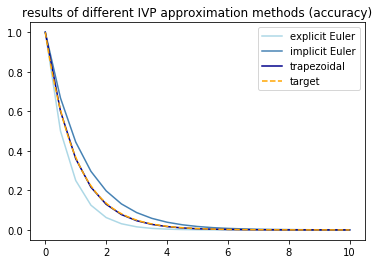

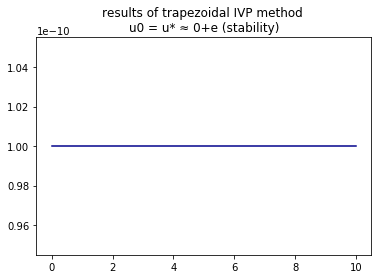

In [133]:
f = lambda u, t : -u
F = lambda x : np.exp(-x)

fig = plt.figure()
#plot Explicit Euler
us, t = theta_method(f, T=10, u0=1, theta=1, k=0.5)
x = np.array(np.linspace(0,t,len(us)))
plt.plot(x, us, c = 'lightblue', label = "explicit Euler")

# plot implicit Euler
us, t = theta_method(f, T=10, u0=1, theta=0, k=0.5)
x = np.array(np.linspace(0,t,len(us)))
plt.plot(x, us, c = 'steelblue', label = "implicit Euler")

# plot trapezoidal
us, t = theta_method(f, T=10, u0=1, theta=0.5, k=0.5)
x = np.array(np.linspace(0,t,len(us)))
plt.plot(x, us, c = 'darkblue', label = "trapezoidal")

# plot target
x = np.array(np.linspace(0,t,100))
plt.plot(x, F(x), '--', c = 'orange', label = "target")

plt.legend()
plt.title("results of different IVP approximation methods (accuracy)")
print()

# plot equilibirum
us, t = theta_method(f, T=10, u0=0+1e-10, theta=0.5, k=0.5)
x = np.array(np.linspace(0,t,len(us)))

fig = plt.figure()
plt.plot(x, us, c = 'darkblue', label = "trapezoidal")
plt.title("results of trapezoidal IVP method \nu0 = u* \u2248 0+e (stability)")
print()

For the vector IVP the same tests were done as for thesclar one, however I only used the trapezoidal rule. Again, using the stable equilibium for u0 gives a stable result. 

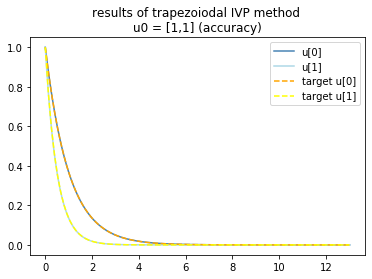

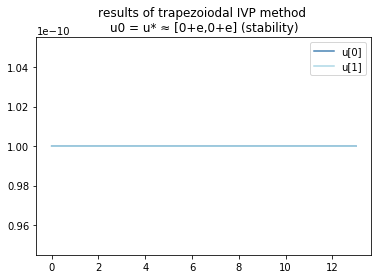

In [134]:
f = lambda u, t : np.array([-u[0], -2*u[1]])

F1 = lambda x : np.exp(-x)
F2 = lambda x : np.exp(-2*x)

#Trapezoidal
us, t = theta_system(f, 13, np.array([1, 1]), theta = 0.5, k = 0.01)

fig = plt.figure()
sub = fig.add_subplot(111)
x = np.array(np.linspace(0,t,len(us)))
sub.plot(x, us[:,0], c = 'steelblue', label = "u[0]")
sub.plot(x, us[:,1], c = 'lightblue', label = "u[1]")


x = np.array(np.linspace(0,t,100))
sub.plot(x, F1(x), '--', c = 'orange', label = "target u[0]")
sub.plot(x, F2(x), '--', c = 'yellow', label = "target u[1]")
sub.legend()
plt.title("results of trapezoiodal IVP method \nu0 = [1,1] (accuracy)")

# test for stability in equilibrium point
us, t = theta_system(f, 13, np.array([0+1e-10, 0+1e-10]), theta = 0.5, k = 0.01)

fig = plt.figure()
sub = fig.add_subplot(111)
x = np.array(np.linspace(0,t,len(us)))
sub.plot(x, us[:,0], c = 'steelblue', label = "u[0]")
sub.plot(x, us[:,1], c = 'lightblue', label = "u[1]")
sub.legend()
plt.title("results of trapezoiodal IVP method \nu0 = u* \u2248 [0+e,0+e] (stability)")
print()

I tested the stochastic differential equation by doing 1000 runs of the algorithm and taking the average of all to approximate the expected run. I compared this to the actual expected result and the last figure displays the error between them. 

mu(x,t) = [-0.1*x[0],-0.5*x[1]]
sigma(x,t) = [N(0,1), N(0,5)]



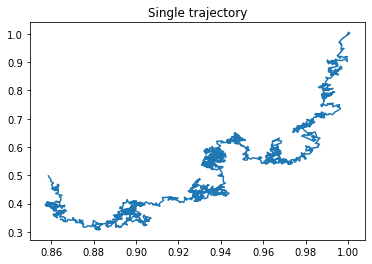

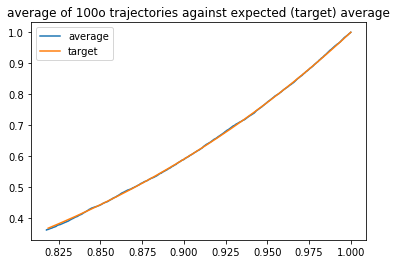

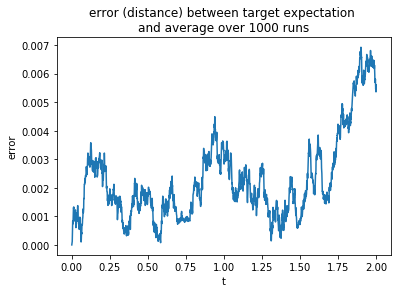

In [136]:
# # one dimensional brownian motion
# mu = lambda x, t : 0
# sigma = lambda x, t: np.random.normal(0,1)

# fig = plt.figure()
# for i in range(100):
#   us, t = stoch_dif_eq(mu,sigma, T=10 ,u0=0, k=0.1)
#   x = np.array(np.linspace(0,t,len(us)))
#   plt.plot(x, us)

# # one dimensional brownian motion
# mu = lambda x, t : -x
# sigma = lambda x, t: np.random.normal(0,1)

# fig = plt.figure()
# for i in range(100):
#   us, t = stoch_dif_eq(mu,sigma, T=10 ,u0=1, k=0.1)
#   x = np.array(np.linspace(0,t,len(us)))
#   plt.plot(x, us)

# two-dimensional brownian motion
mu = lambda x, t : np.array([-0.1*x[0],-0.5*x[1]])
sigma = lambda x, t: np.array([np.random.normal(0,1),np.random.normal(0,5)])
print("mu(x,t) = [-0.1*x[0],-0.5*x[1]]")
print("sigma(x,t) = [N(0,1), N(0,5)]")

us, t = stoch_dif_eq(mu,sigma, T=2 , u0=np.array([1,1]), k=0.001 )

# plot a single trajectory
fig = plt.figure()
plt.plot(us[:,0],us[:,1])
plt.title("Single trajectory")

# plot average and target expectation
exp, _ = stoch_dif_eq(mu,sigma, T=2 , u0=np.array([1,1]), k=0.001 )
for i in range(1000):
  us, t = stoch_dif_eq(mu,sigma, T=2 , u0=np.array([1,1]), k=0.001 )
  exp = exp+us
targ_u_0 = lambda x : np.exp(-0.1*x)
targ_u_1 = lambda x : np.exp(-0.5*x)
exp = exp/1001
x = np.array(np.linspace(0,t,exp.shape[0]))
tu0= targ_u_0(x)
tu1 = targ_u_1(x)
fig = plt.figure()
plt.plot(exp[:,0],exp[:,1], label = "average")
plt.plot(tu0,tu1, label = "target")
plt.legend()
plt.title("average of 100o trajectories against expected (target) average")

# error
err = []
for i in range(exp.shape[0]):
  err.append(pow(pow(exp[i,0]-tu0[i],2)+pow(exp[i,1]-tu1[i],2) ,0.5))
fig = plt.figure()
plt.plot(np.linspace(0,t,exp.shape[0]),err)
plt.xlabel("t")
plt.ylabel("error")
plt.title("error (distance) between target expectation \nand average over 1000 runs")

print()

# **Discussion**

I found that all my functions worked satisfactory. From the first test I found that the trapezoidal rule seems the most accurate approximation of the target function. In general, taking smaller steps gives a more accurate approximation. However, too small steps started interfering with the tolerance of my Newton's method function, resulting in no change if the time step was too small. 

For the Stochastic differential equation, I found that the average got closer to the expectation when taking the average over more runs, or when using less variance in the sigma function. 